<a id='intro'></a>
## Introduction
The dataset is about a person made an appointment with a doctor but not showing up. The goal is to analyst the factor that makes people missing an appointment.
we have 300k medical appointments with 15 variables
Gender: male,famale
Scholarship:0,1
Hipertension	Diabetes	Alcoholism	Handcap	SMS_received


In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<a id='wrangling'></a>
## Data Wrangling



In [3]:
#Load data 
# types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshow.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
#check the dimension of dataframe
df.shape

(110527, 14)

In [5]:
#check the data type if we need to correct some later
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


** after observed data** 
**we may change type of 'PatientId','scheduledDay','AppointmentDay'.**

In [6]:
# check missing value in dataset
df.isnull().any()

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool

In [7]:
# return unique value on age variable
np.sort(df.Age.unique())


array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 102, 115])

In [8]:
# check the number of unique value
df.nunique()

PatientId          61744
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [9]:
#check handcap level
df.Handcap.unique()

array([0, 1, 2, 3, 4])

In [10]:
#check duplicated value
sum(df.duplicated())

0


### Data Cleaning (Replace this with more specific notes!)

In [11]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
#step one cleaning name column 
df.rename(columns=lambda x:x.lower().replace('-','_'),inplace=True)
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [12]:
# replace the wrong name of columns
df.rename(columns={'hipertension':'hypertension','handcap':'handicap'},inplace =True)

In [13]:
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [14]:
# fixing data type
df['patientid']=df['patientid'].astype(int)
df['scheduledday']=pd.to_datetime(df['scheduledday'])
df['appointmentday']=pd.to_datetime(df['appointmentday'])
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,29872500000000,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558998000000000,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262960000000,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951000000,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841190000000,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [15]:
# get the date in week in term of number 1 means Monday ....
#df['date_in_week']= pd.to_datetime(df['appointmentday']).apply(lambda x: x.isoweekday())
#df['date_in_week']

df['scheduledday']=df['scheduledday'].dt.date





In [16]:
#get waiting_time
df['scheduledday']=pd.to_datetime(df['scheduledday'])
df['waiting_time']=df['appointmentday']-df['scheduledday']
df['waiting_time']=df['waiting_time'].dt.days


In [17]:
#removing outlier of age 
df=df.query('age <100 and age>=0')


In [18]:
#get dummy varible of gender and no_show
gender_dummy=pd.get_dummies(df.gender) 
no_show_dummy=pd.get_dummies(df.no_show)
df_new=pd.concat([df,gender_dummy,no_show_dummy],axis=1)
df_new.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,waiting_time,F,M,No,Yes
0,29872500000000,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,1,0,1,0
1,558998000000000,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,0,1,1,0
2,4262960000000,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,1,0,1,0
3,867951000000,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,1,0,1,0
4,8841190000000,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,1,0,1,0


<a id='eda'></a>
## Exploratory Data Analysis


### what is the percentage of people no showing up?

In [19]:
# percertage of people no showing up
p_noshow=df_new.query('Yes==1').count()[0]/df_new.shape[0]
print(p_noshow)


0.20192734018


### scholarship does influence the rate of no showing up?

Text(0,0.5,'percentage')

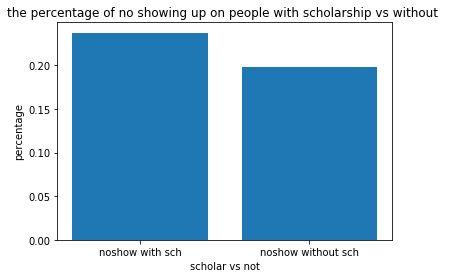

In [30]:
# under the condition of having scholarship or not, what is the percentage of people no showing up

df_yes_s=df_new.query('scholarship==1')['Yes'].sum()/df_new.query('scholarship==1').count()[0]
df_yes_ns=df_new.query('scholarship==0')['Yes'].sum()/df_new.query('scholarship==0').count()[0]
plt.bar(['noshow with sch','noshow without sch'],[df_yes_s,df_yes_ns])
plt.title('the percentage of no showing up on people with scholarship vs without ')
plt.xlabel('scholar vs not')
plt.ylabel('percentage')

** it seems like people with schlarship are much more likely to be no showing on appointment**
    

## Does gender affect ?


Text(0,0.5,'percentage')

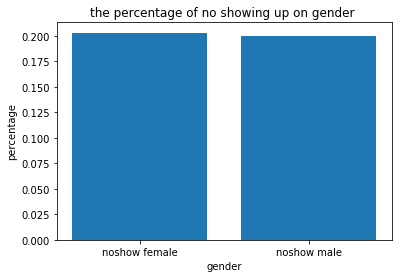

In [29]:
# under the condition of gender, what is the percentage of people no showing up
df_yes_f=df_new.query('F==1')['Yes'].sum()/df_new.query('F==1').count()[0]
df_yes_m=df_new.query('M==1')['Yes'].sum()/df_new.query('M==1').count()[0]
plt.bar(['noshow female','noshow male'],[df_yes_f,df_yes_m])
plt.title('the percentage of no showing up on gender ')
plt.xlabel('gender')
plt.ylabel('percentage')

** from the barplot above, I do not see difference between gender, which means they have equal no showing up rates.**

## Explore the relationship between two parameters 

Text(0.5,1,'explore relationship between two numerical parameters')

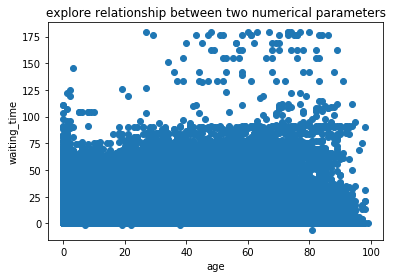

In [27]:
plt.scatter(df.age,df.waiting_time)
plt.xlabel('age')
plt.ylabel('waiting_time')
plt.title('explore relationship between two numerical parameters')

** more older more like to wait longer time between appointment day and schedule day **

## Boxplot on numerical variables

Text(0.5,1,'age description')

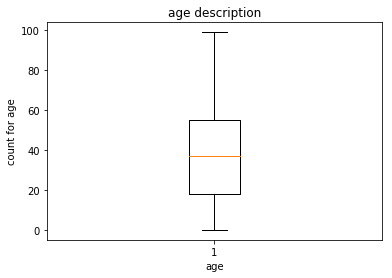

In [33]:
# boxplot for age 
plt.boxplot(df.age)
plt.xlabel('age')
plt.ylabel('count for age')
plt.title('age description')

** most of people are around 20 to 60 years age **

Text(0.5,1,'The time between appointment day and schedule ')

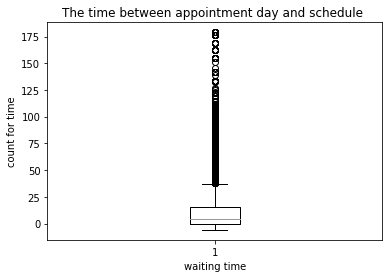

In [34]:
# boxplot for waiting time 
plt.boxplot(df.waiting_time)
plt.xlabel('waiting time')
plt.ylabel('count for time')
plt.title('The time between appointment day and schedule ')

** most of people make a appointment in advance between 0 to 20 days ** 

## Apply any mode that fits on this case in order to find the most import variable for no showing up


In [22]:
df_new.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,waiting_time,F,M,No,Yes
0,29872500000000,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,1,0,1,0
1,558998000000000,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,0,1,1,0
2,4262960000000,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,1,0,1,0
3,867951000000,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,1,0,1,0
4,8841190000000,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,1,0,1,0


In [27]:
#conduct a logistic regression model
# create intercept 
df_new['intercept']=1
logit_mod=sm.Logit(df_new.Yes,df_new[['intercept','age','scholarship','hypertension','diabetes','alcoholism','handicap','sms_received','waiting_time','F']])
results=logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 303.535953
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    Yes   No. Observations:               110515
Model:                          Logit   Df Residuals:                   110505
Method:                           MLE   Df Model:                            9
Date:                Wed, 22 Aug 2018   Pseudo R-squ.:                -0.08404
Time:                        04:10:06   Log-Likelihood:            -3.3545e+07
converged:                       True   LL-Null:                   -3.0945e+07
                                        LLR p-value:                     1.000
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept       -1.5360      0.018    -83.713      0.000      -1.572      -1.500
age             -0.0078      0.000    -19.607      0.000      -0.009      -0.007
scholarship      0.2285      0.025      9.236      0.000       0.180       0.277
hypertension    -0.0378      0.025     -1.514      0.130      -0.087       0.011
diabetes         0.1276      0.035      3.686      0.000       0.060       0.195
alcoholism       0.2160      0.045      4.784      0.000       0.127       0.304
handicap         0.0529      0.049      1.075      0.282      -0.044       0.149
sms_received     0.3530      0.017     20.931      0.000       0.320       0.386
waiting_time     0.0230      0.000     47.283      0.000       0.022       0.024
F                0.0143      0.016      0.865      0.387      -0.018       0.047
================================================================================
"""

In [28]:
#get age coef with exponentation reciprocal
age_par=1/np.exp(-0.0078)
print(age_par)

1.00783049925


** For 1 year decrease in age, noshowing is 1.007 times happen holding all else constant **

In [29]:
#get scholarship coef with exponential
scholar_par=np.exp(0.2285)
print(scholar_par)

1.25671352513


** noshowing is 1.2 times happen if people with scholarship than without holding all else constant ** 

In [30]:
#get diabetes coef with exponential
diabete_par=np.exp(0.1276)
print(diabete_par)

1.13609847241


** noshowing is 1.13 times happen if people is diabete than not holding all else constant**

In [31]:
#get hypertension  coef with exponential
hy_par=1/np.exp(-0.0378)
print(hy_par)

1.03852350741


** For 1 level of hypertension decrease , noshowing is 1.0385 times happen holding all else constant . However, the p-value is greater than critical p-value(0.05) ,so it is insignificant**

In [32]:
#get alcoholism coef with exponential
al_par=np.exp(0.2160)
print(al_par) 

1.241102379


** noshowing is 1.24 times happen if people is alcoholism than not holding all else constant**

In [33]:
#get handicap coef with exponential
hand_par=np.exp(0.0529)
print(hand_par)

1.05432420743


**noshowing is 1.05 times happen if people is handicap than not holding all else constant**

In [34]:
#get sms_received coef with exponential
sms_par=np.exp(0.3530)
print(sms_par)

1.42333114343


** noshowing is 1.42 times happen if people was recieved the msg than not holding all else constant**

In [35]:
#get waiting_time coef with exponential
waiting_par=np.exp(0.0230)
print(waiting_par)

1.02326653955


** For increasing one day between scheduled day and appointment day, noshowing is 1.02 times happen holding all else constant**

In [36]:
#get female coef with exponential
female_par=np.exp(0.0143)
print(female_par)

1.01440273412


** gender is not significant in our model since p-value is greater critical p-value 0.05 **

# <a id='conclusions'></a>
## Conclusions

** 1.gender does not affect noshowing case. 2.The level of hypertension does not matter for noshowing case.3 handicap is not a significant predictor.3 younger age people seems like to not show up on the day.4. message reminder makes people willing to not come. 5.People without scholarship are more likly to show up on the day. **
## limitations
** The data is not including all the months, so the time may be affected the results(time serier)**


In [37]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0